# Workshop 3: Solutions

## Exercise 1

In order to decide how to calculate the next term in the sequence, we need to work out whether $n$ is even or odd. Recall from tutorial 1 that we can use the modulus operator `%` to find the remainder after floor division. So if $n % 2$ is equal to $0$ then $n$ must be even.

In [1]:
def collatz_op(n):
    if (n % 2) == 0:     # check if n is even
        next_term = n / 2
    else:                # must be odd
        next_term = (n * 3) + 1 
    
    return next_term

We can check the function works by trying it out for `n = 5` and `n = 6`. When `n = 5` we triple it and add `1`, so the next term if 16. When `n = 6` we divide it by two so the next term is `3`.

In [2]:
print(collatz_op(5))
print(collatz_op(6))

16
3.0


## Exercise 2

To calculate the Collatz Number of `n` we need to iteratively calculate the next term in the sequence until we get to `1` and calculate how many iterations we used. Note that the Collatz Number of `1` is `1`, so the counter should be initialised to `1`.

In [3]:
def collatz_number(n):
    num = 1
    while n > 1:
        num += 1
        n = collatz_op(n)
    
    return num

Let's check this works using `n = 5` and `n = 6`. We know that the Collatz Number of $5$ is $6$. When $n$ is $6$, the Collatz Sequence is $6, 3, 10, 5, 16, 8, 4, 2, 1$ so the Collatz Number is $9$.

In [4]:
print('The Collatz Number of 5 is ', collatz_number(5))
print('The Collatz Number of 6 is ', collatz_number(6))

The Collatz Number of 5 is  6
The Collatz Number of 6 is  9


## Exercise 3

Text(0, 0.5, 'Collatz Number')

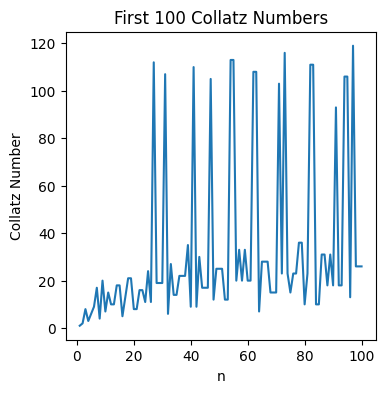

In [5]:
import numpy as np
import matplotlib.pyplot as plt

collatz_numbers = np.zeros(100)

for i in range(100):
    collatz_numbers[i] = collatz_number(i + 1)

# remember to plot the collatz numbers against 1-100, not 0-99
plt.figure(figsize=(4,4))
plt.plot(np.linspace(1, 100, 100), collatz_numbers)
plt.title('First 100 Collatz Numbers')
plt.xlabel('n')
plt.ylabel('Collatz Number')

## Exercise 4

Using our code from last week, we just need to make a little addition to calculate peak infections:

For infection rate 5e-05 infections peak at 14873.5610390745 cases.


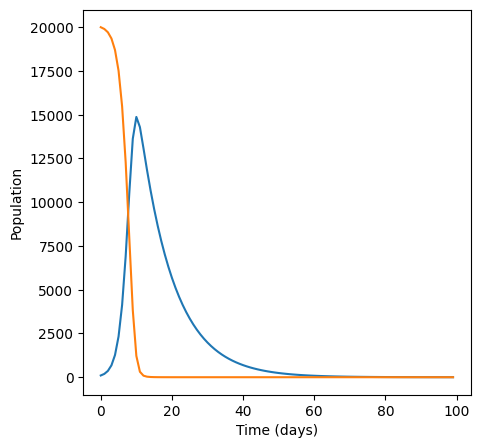

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# set up variables and arrays
n_days = 100
a = 0.1
b = 0.00005
S = np.zeros(n_days)
I = np.zeros(n_days)

# initialise the variables
S[0] = 20000
I[0] = 100

# implement equations
for i in range(n_days - 1):
    S[i+1] = S[i] - (b * S[i] * I[i])
    I[i+1] = I[i] + (b * S[i] * I[i]) - (a * I[i])

# plot the figure
plt.figure(figsize=(5,5))
plt.plot(I)
plt.plot(S)
plt.xlabel("Time (days)")
plt.ylabel("Population")


# check the maximum 
peak_infections = np.max(I)
print('For infection rate', b, 'infections peak at', peak_infections, 'cases.')

Looking at the graph, infections peak at around $15000$ cases, which is similar to what we find frpom `np.max`. Let's check for another value of $b$.

For infection rate 1e-05 infections peak at 3245.641623687537 cases.


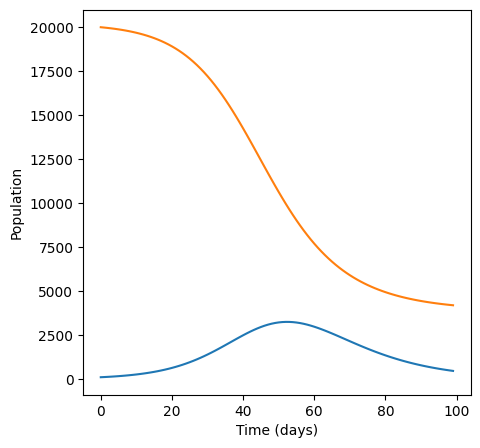

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# set up variables and arrays
n_days = 100
a = 0.1
b = 0.00001
S = np.zeros(n_days)
I = np.zeros(n_days)

# initialise the variables
S[0] = 20000
I[0] = 100

# implement equations
for i in range(n_days - 1):
    S[i+1] = S[i] - (b * S[i] * I[i])
    I[i+1] = I[i] + (b * S[i] * I[i]) - (a * I[i])

# plot the figure
plt.figure(figsize=(5,5))
plt.plot(I)
plt.plot(S)
plt.xlabel("Time (days)")
plt.ylabel("Population")


# check the maximum 
peak_infections = np.max(I)
print('For infection rate', b, 'infections peak at', peak_infections, 'cases.')

This time, both from `np.max` and by visually inspecting the graph we see that the peak number of infections is much lower. 

## Exercise 5

1. First we need to write a function that will return the maximum number of infected people for different parameter values. We can just modify the code above so that it is inside a function:

In [8]:
def max_infected(a, b):
    # Run the simulation and calculate
    # the peak number of infections
    
    # set up variables and arrays
    n_days = 100
    S = np.zeros(n_days)
    I = np.zeros(n_days)

    # initialise the variables
    S[0] = 20000
    I[0] = 100

    # implement equations
    for i in range(n_days - 1):
        S[i+1] = S[i] - (b * S[i] * I[i])
        I[i+1] = I[i] + (b * S[i] * I[i]) - (a * I[i])
        
    # check the maximum 
    peak_infections = np.max(I)
    
    return peak_infections

We can check this works by calling the function for `a = 0.1` and the values of `b` we tested above. For example:

In [9]:
max_infected(0.1, 0.00005)

np.float64(14873.5610390745)

returns $14873$, as we expect!

2\. Recall from last week that to generate `10` evenly spaced numbers from  `0` to `0.00005` we can use:

In [10]:
b_array = np.linspace(0, 0.00005, 10)

3\. Again, recall from last week that we can create an array containing 10 zeros:

In [11]:
peak_infections = np.zeros(10)

4\. We have also seem how to use a loop to set a value in an array - notice that we need to retrieve each value of `b` to test from `b_array`.

In [12]:
for i in range(10):
    # Calculate the peak number of infections
    # for the given value of b
    peak_infections[i] = max_infected(0.1, b_array[i])

5\. Now we just need to plot the `peak_infections` array against `b_array` to see how peak infections vary with the infection parameter.

Text(0, 0.5, 'Peak infection')

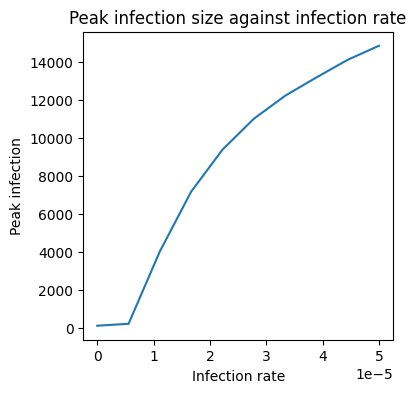

In [13]:
# Create a plot of peak infections against b
plt.figure(figsize=(4,4))
plt.plot(b_array, peak_infections)
plt.title('Peak infection size against infection rate')
plt.xlabel('Infection rate')
plt.ylabel('Peak infection')

Putting this altogether we have:

Text(0, 0.5, 'Peak infection')

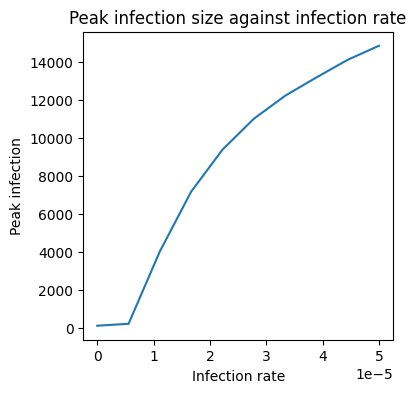

In [14]:
def max_infected(a, b):
    # Run the simulation and calculate
    # the peak number of infections
    
    # set up variables and arrays
    n_days = 100
    S = np.zeros(n_days)
    I = np.zeros(n_days)

    # initialise the variables
    S[0] = 20000
    I[0] = 100

    # implement equations
    for i in range(n_days - 1):
        S[i+1] = S[i] - (b * S[i] * I[i])
        I[i+1] = I[i] + (b * S[i] * I[i]) - (a * I[i])
        
    # check the maximum 
    peak_infections = np.max(I)
    
    return peak_infections

b_array = np.linspace(0, 0.00005, 10)
peak_infections = np.zeros(10)

for i in range(10):
    # Calculate the peak number of infections
    # for the given value of b
    peak_infections[i] = max_infected(0.1, b_array[i])

# Create a plot of peak infections against b
plt.figure(figsize=(4,4))
plt.plot(b_array, peak_infections)
plt.title('Peak infection size against infection rate')
plt.xlabel('Infection rate')
plt.ylabel('Peak infection')

As we expect, as the infection rate grows so does the peak infection!

## Exercise 6

We can use the function `np.sum` to sum the values in an array. To find out the total number of infected person-days we just need to sum the values in `I` - so we just need to make a small tweak to the `max_infected` function we wrote above:

In [15]:
def total_infected(a, b):
    # Run the simulation and calculate
    # the total number of infections

    # set up variables and arrays
    n_days = 100
    S = np.zeros(n_days)
    I = np.zeros(n_days)

    # initialise the variables
    S[0] = 20000
    I[0] = 100

    # implement equations
    for i in range(n_days - 1):
        S[i+1] = S[i] - (b * S[i] * I[i])
        I[i+1] = I[i] + (b * S[i] * I[i]) - (a * I[i])

    # check the total - sum instead of max!
    total_infections = np.sum(I)

    return total_infections

This code is tricky to test as it is not easy to see the total infected person-days from the graph! However, when $b = 0$ and $a = 1$, the equations reduce to 
:::{math}
:label: SIR_equations_exercise
\begin{align}S_{i+1} &= S_i \\
I_{i+1} &= 0.\end{align}
:::

so everyone recovers after just $1$ day, and no one else is infected. This means the total infected person-days for these parameter values should be $100$ - let's check!

In [16]:
total_infected(1, 0)

np.float64(100.0)

Now we just need to plot the total infected person-days for different values of $b$ - just like we did above:

Text(0, 0.5, 'Total infection size')

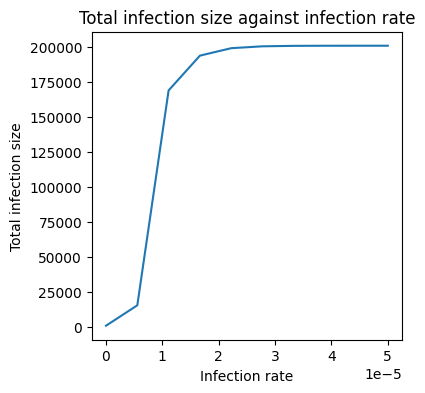

In [17]:
# set up variables and arrays
b_array = np.linspace(0, 0.00005, 10)
total_infections = np.zeros(10)

for i in range(10):
    # Calculate the total number of infections
    # for the given value of b
    total_infections[i] = total_infected(0.1, b_array[i])

# Create a plot of total infections against b
plt.figure(figsize=(4,4))
plt.plot(b_array, total_infections)
plt.title('Total infection size against infection rate')
plt.xlabel('Infection rate')
plt.ylabel('Total infection size')

## Exercise 7

As above, let's check the costs for 10 values of $b$ in the range $0$ to $0.00005$. We need to set up arrays to contain the costs and then calculate the corresponding cost for each value of $b$.

Notice that when $b = 0$ the formula suggests the intervention cost will be infinite - Python cannot handle dividing by zero (try it!) and will throw an error. To get around this, we can use `np.linspace` to set up the array for $b$ as normal, and then just make the first element non-zero (but still small). 

Also notice that rather than initialising a third array and calculating each element of `total_cost` one by one, we have just been able to add the `intervention_cost` and `medical_cost` arrays together - this works because they are both the same size!

:::

```{code-cell} ipython3
# set up variables and arrays
b_array = np.linspace(0, 0.00005, 10)
intervention_cost = np.zeros(10)
medical_cost = np.zeros(10)

# avoid b = 0
b_array[0] = 0.000001

for i in range(10):
    intervention_cost[i] = 1/(5 * b_array[i]) - 2000
    medical_cost[i] = total_infected(0.1, b_array[i])

# add up the total cost
total_cost = intervention_cost + medical_cost

# Create a plot of costs against b
plt.figure(figsize=(4,4))
plt.plot(b_array, intervention_cost)
plt.plot(b_array, medical_cost)
plt.plot(b_array, total_cost)
plt.title('Costs against infection rate')
plt.xlabel('Infection rate')
plt.ylabel('Cost (thousands of £s)')
```

Examining the graph, we can see that costs are minimised when $b \approx 5 \times 10^{-6}$.